## Assignment 2 ##

In [2]:
import numpy as np
import scipy as sp
from scipy.constants import g
import matplotlib.pyplot as plt

### Question 1 ###

In [3]:
def GEPP(A, b, doPivot = True):
    '''
    Gaussian elimination with partial pivoting.
    
    input: A is an n x n numpy matrix
           b is an n x 1 numpy array
    output: x is the solution of Ax=b 
            with the entries permuted in 
            accordance with the pivoting 
            done by the algorithm
    post-condition: A and b have been modified.
    '''
    n = len(A)
    # print(f'n={n}')
    if b.size != n:
        raise ValueError("Invalid argument: incompatible sizes between"+
                         "A and b.", b.size, n)
    # k represents the current pivot row. Since GE traverses the matrix in the 
    # upper right triangle, we also use k for indicating the k-th diagonal 
    # column index.
    no_of_changes=0
    # Elimination
    for k in range(n-1):
        if doPivot:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                no_of_changes+=1
                # print('swapping rows')
                A[[k,maxindex]] = A[[maxindex, k]]
                b[[k,maxindex]] = b[[maxindex, k]]
        else:
            # print('no-partial pivoting')
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting doPivot to True.")
        #Eliminate
        for row in range(k+1, n):
            multiplier = A[row,k]/A[k,k]
            A[row, k:] = A[row, k:] - multiplier*A[k, k:]
            b[row] = b[row] - multiplier*b[k]
    # Back Substitution
    # print(A)
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        # print(f'k={k}')
        
        x[k] = (b[k].item() - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k].item()
    return x, no_of_changes

In [4]:
A = np.array([[1, -2, 4], [8, -3, 2], [-1, 10, 2]])
b = np.array([6, 2, 4])
doPivot = True
x, NORC = GEPP(A, b, doPivot)
print(f"The number of row interchanges needed is {NORC}")
x

The number of row interchanges needed is 2


array([-0.13888889,  0.07407407,  1.66666667])

In [5]:
def GEPPRound3(A, b, doPivot = True):
    '''
    Gaussian elimination with partial pivoting.
    
    input: A is an n x n numpy matrix
           b is an n x 1 numpy array
    output: x is the solution of Ax=b 
            with the entries permuted in 
            accordance with the pivoting 
            done by the algorithm
    post-condition: A and b have been modified.
    '''
    n = len(A)
    A = np.float64(A)
    b = np.float64(b)
    # print(f'n={n}')
    if b.size != n:
        raise ValueError("Invalid argument: incompatible sizes between"+
                         "A and b.", b.size, n)
    # k represents the current pivot row. Since GE traverses the matrix in the 
    # upper right triangle, we also use k for indicating the k-th diagonal 
    # column index.
    no_of_changes=0
    # Elimination
    for k in range(n-1):
        if doPivot:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                no_of_changes+=1
                # print('swapping rows')
                A[[k,maxindex]] = A[[maxindex, k]]
                b[[k,maxindex]] = b[[maxindex, k]]
        else:
            # print('no-partial pivoting')
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting doPivot to True.")
        #Eliminate
        for row in range(k+1, n):
            multiplier = np.round(np.float64(A[row,k]/A[k,k]), 3)
            A[row, k:] = A[row, k:] - multiplier*A[k, k:]
            b[row] = b[row] - multiplier*b[k]
    # Back Substitution
    # print(A)
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        # print(f'k={k}')
        
        x[k] = np.round(np.float64((b[k].item() - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k].item()), 3)
    return x, no_of_changes

A = np.array([[1, -2, 4], [8, -3, 2], [-1, 10, 2]])
b = np.array([6, 2, 4])
doPivot = True
x, NORC = GEPPRound3(A, b, doPivot)
print(f"The number of row interchanges needed is {NORC}")
x

The number of row interchanges needed is 2


array([-0.113,  0.075,  1.566])

In [6]:
A = np.array([[1, -2, 4], [8, -3, 2], [-1, 10, 2]])
b = np.array([6, 2, 4])
doPivot = False
x, NORC = GEPPRound3(A, b, doPivot)
print(f"The number of row interchanges needed is {NORC}")
x

The number of row interchanges needed is 0


array([-0.114,  0.075,  1.566])

When we don't do any row interchanges, the solution changes.

### Question 2 ###

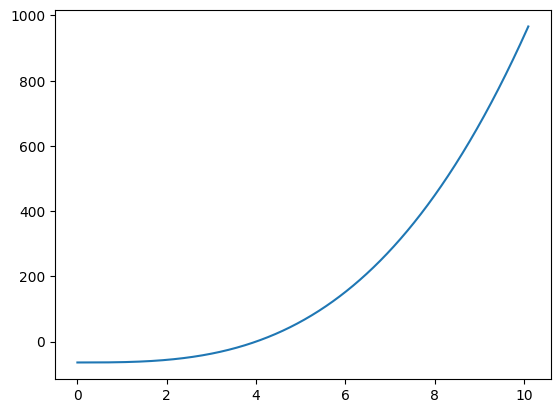

In [7]:
N = 64
f = lambda x: x**3 - N
x = np.linspace(0, 10.1, 1000)
plt.plot(x, f(x))

In [8]:
eps = 1e-7
def CubeRootInter(N, eps, x_0):
    x = 2/3*(x_0 + N/(2*x_0**2))
    tolerance = abs((x-x_0)/x_0)
    while(tolerance > eps):
        x_0 = x
        x = 2/3*(x_0 + N/(2*x_0**2)) 
        tolerance = abs((x-x_0)/x_0)
    return x
CubeRootInter(N, eps, 10)

4.0

The cube root of my chosen N (i.e. 64) is 4.0.

### Question 3 ###

In [9]:
def Minor(A, i, j):
    M1 = np.concatenate((A[:i, :], A[(i+1):, :]), axis = 0)
    M = np.concatenate((M1[:, :j], M1[:, (j+1):]), axis=1)
    return M
A = np.array([[1, 4, 3], [2, 10, 5], [6, 9, 7]])

In [10]:
def Det(A):
    n = A.shape[0]
    if(n==1): return A[0][0]
    det = 0
    for i in range(n):
        det += A[0, i] * (-1)**i * Det(Minor(A, 0, i))
    return det

In [11]:
def Inverse(A):
    n = A.shape[0]
    adjA = np.zeros_like(A)
    for i in range(n):
        for j in range(n):
            adjA[j, i] = (-1)**(i+j) * Det(Minor(A, i, j))
    return adjA/Det(A)

In [12]:
invA = Inverse(A)
invA@A

array([[ 1.00000000e+00,  1.11022302e-16, -1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16, -4.44089210e-16,  1.00000000e+00]])

### Question 4 ###

In [13]:
def InfNorm(A):
    return max(np.sum(abs(A), axis = 1))
def Cond(A):
    return InfNorm(A)*InfNorm(Inverse(A))
A = np.array([[1.99, 2.01], [2.01, 1.99]])
Cond(A)

np.float64(200.00000000000313)

In [14]:
def GEPP(A, b, doPivot = True):
    '''
    Gaussian elimination with partial pivoting.
    
    input: A is an n x n numpy matrix
           b is an n x 1 numpy array
    output: x is the solution of Ax=b 
            with the entries permuted in 
            accordance with the pivoting 
            done by the algorithm
    post-condition: A and b have been modified.
    '''
    A = np.float64(A)
    b = np.float64(b)
    n = len(A)
    # print(f'n={n}')
    if b.size != n:
        raise ValueError("Invalid argument: incompatible sizes between"+
                         "A and b.", b.size, n)
    # k represents the current pivot row. Since GE traverses the matrix in the 
    # upper right triangle, we also use k for indicating the k-th diagonal 
    # column index.
    # Elimination
    for k in range(n-1):
        if doPivot:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                # no_of_changes+=1
                # print('swapping rows')
                A[[k,maxindex]] = A[[maxindex, k]]
                b[[k,maxindex]] = b[[maxindex, k]]
        else:
            # print('no-partial pivoting')
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting doPivot to True.")
        #Eliminate
        for row in range(k+1, n):
            multiplier = np.float64(A[row,k]/A[k,k])
            A[row, k:] = np.float64(A[row, k:] - multiplier*A[k, k:])
            b[row] = np.float64(b[row] - multiplier*b[k])
    # Back Substitution
    # print(A)
    x = np.zeros_like(b)
    for k in range(n-1, -1, -1):
        x[k] = np.float64((b[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k].item())
    return x

In [15]:
A = np.array([[3, 2, 4], [8, -6, -8], [-1, 2, 3]])
b = np.array([9, -6, 4])
x = GEPP(A, b, False)
x

array([1., 1., 1.])

In [16]:
A = np.array([[3, 2, 4], [8, -6, -8], [-1, 2, 3]])
b = np.array([9, -6, 4])
x = GEPPRound3(A, b, False)
x

(array([1.005, 1.038, 0.977]), 0)

Rounding gives less precise results.

### Question 5 ###

$$ \frac{du}{dt} = -3e^{-t} - 3u = f(t, u)$$

In [17]:
f = lambda u,t: -3*np.exp(-t)-3*u
u_exact = lambda t: 1.5*(2*np.exp(-3*t) - np.exp(-t))
a, b = 0, 5
def Euler_Scheme(a, b, dt, f, method):
    nt = np.int64((b-a)/dt)
    t = np.zeros(nt+1)
    for i in range(nt+1): t[i] = i*dt
    u_e = np.zeros_like(t)
    u_e[0] = 1.5
    if(method=='e'):
        for i in range(1, nt + 1):
            # print(i)
            u_e[i] = u_e[i-1] + dt*f(u_e[i-1], t[i-1])
    elif(method=='me'):
        u_e[0] = 1.5
        for i in range(1, nt+1):
            u_ = u_e[i-1] + dt*f(u_e[i-1], t[i-1])
            u_e[i] = u_e[i-1] + 0.5*dt*(f(u_, t[i]) + f(u_e[i-1], t[i-1]))
    elif(method=='be'):
        u_e[0] = 1.5
        for i in range(1, nt+1):
            u_e[i] = (u_e[i-1] - 3*dt*np.exp(-t[i]))/(3*dt+1)
    else: u_e = 0
    return u_e, t

In [18]:
def Analytical_Scheme(a, b, dt, u_exact):
    nt = np.int64((b-a)/dt)
    t = np.zeros(nt+1)
    for i in range(nt+1): t[i] = i*dt
    # nt = np.int64((b-a)/dt)
    # print(nt)
    # t = np.zeros(nt+1)
    u_analytical = u_exact(t)
    return u_analytical, t

In [19]:
def Runge_Kutta(a, b, dt, f):
    nt = np.int64((b-a)/dt)
    t = np.zeros(nt+1)
    for i in range(nt+1): t[i] = i*dt
    nt = int((b-a)/dt)
    # print(nt)
    # t = np.zeros(nt+1)
    u_rk = np.zeros_like(t)
    u_rk[0] = 1.5
    for i in range(1, nt+1):
        u_rk[i] = (u_rk[i-1] - 3*dt*np.exp(-t[i]))/(3*dt+1)
        u_rk[i] = u_rk[i-1] + dt*f(u_rk[i-1] + 0.5*dt*f(u_rk[i-1], t[i-1]), t[i-1] + 0.5*dt)
    return u_rk, t

In [20]:
# u_e, u_me, u_be = Euler_Schemes(a, b, dt, f)
u_analytical, t = Analytical_Scheme(a, b, 0.01, u_exact)
# u_rk = Runge_Kutta(a, b, dt, f)

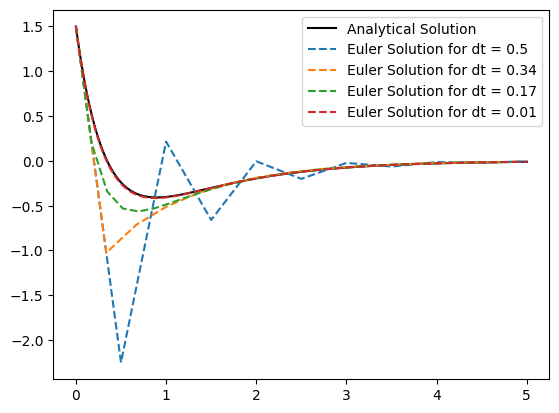

In [21]:
# nt = np.int64((b-a)/dt)
# t = np.zeros(nt+1)
# for i in range(nt+1): t[i] = i*dt
plt.plot(t, u_analytical, color='black', label='Analytical Solution')
dts = np.linspace(0.5, 0.01, 4)
for i in range(len(dts)):
    plt.plot(Euler_Scheme(a, b, dts[i], f, 'e')[1], Euler_Scheme(a, b, dts[i], f, 'e')[0], ls='dashed', label = f"Euler Solution for dt = {np.round(dts[i], 2)}")
plt.legend()
plt.show()

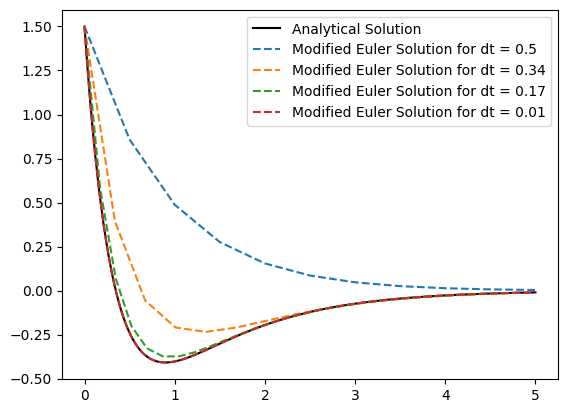

In [22]:
# plt.plot(t, u_analytical, color='r')
# plt.plot(t, u_analytical, color='r', label='Analytical Solution')
# plt.plot(t, u_me, ls='dashed', color='b')
# plt.show()
plt.plot(t, u_analytical, color='black', label='Analytical Solution')
dts = np.linspace(0.5, 0.01, 4)
for i in range(len(dts)):
    plt.plot(Euler_Scheme(a, b, dts[i], f, 'me')[1], Euler_Scheme(a, b, dts[i], f, 'me')[0], ls='dashed', label = f"Modified Euler Solution for dt = {np.round(dts[i], 2)}")
plt.legend()
plt.show()

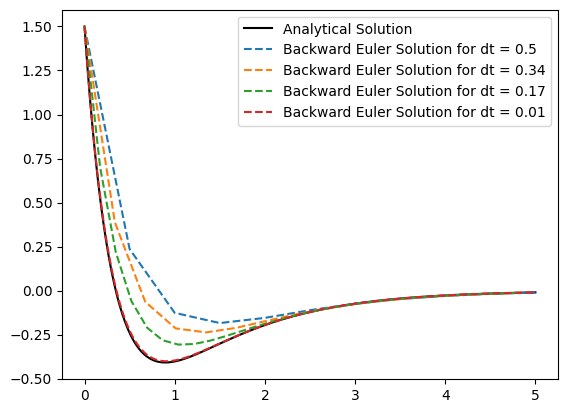

In [23]:
# plt.plot(t, u_analytical, color='r')
# plt.plot(t, u_analytical, color='r', label='Analytical Solution')
# plt.plot(t, u_be, ls='dashed', color='b')
# plt.show()
plt.plot(t, u_analytical, color='black', label='Analytical Solution')
dts = np.linspace(0.5, 0.01, 4)
for i in range(len(dts)):
    plt.plot(Euler_Scheme(a, b, dts[i], f, 'be')[1], Euler_Scheme(a, b, dts[i], f, 'be')[0], ls='dashed', label = f"Backward Euler Solution for dt = {np.round(dts[i], 2)}")
plt.legend()
plt.show()

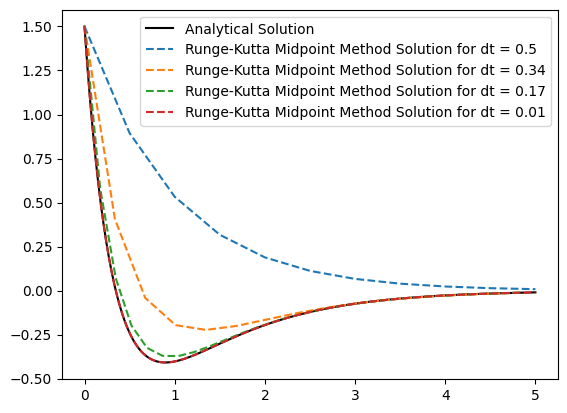

In [24]:
# plt.plot(t, u_analytical, color='r')
# plt.plot(t, u_analytical, color='r', label='Analytical Solution')
# plt.plot(t, u_rk, ls='dashed', color='b')
# plt.show()
plt.plot(t, u_analytical, color='black', label='Analytical Solution')
dts = np.linspace(0.5, 0.01, 4)
for i in range(len(dts)):
    plt.plot(Runge_Kutta(a, b, dts[i], f)[1], Runge_Kutta(a, b, dts[i], f)[0], ls='dashed', label = f"Runge-Kutta Midpoint Method Solution for dt = {np.round(dts[i], 2)}")
plt.legend()
plt.show()

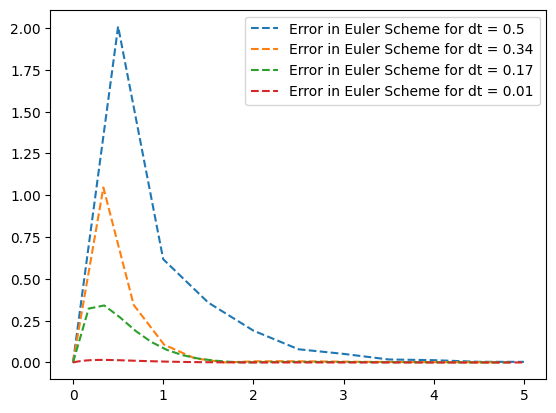

In [25]:
# e_me = abs(Euler_Scheme(a, b, dts[i], f, 'me')[0] - u_exact(Euler_Scheme(a, b, dts[i], f, 'e')[1]))
e_rk = abs(Runge_Kutta(a, b, dts[i], f)[0] - u_exact(Runge_Kutta(a, b, dts[i], f)[1]))
dts = np.linspace(0.5, 0.01, 4)
for i in range(len(dts)):
    e_e = abs(Euler_Scheme(a, b, dts[i], f, 'e')[0] - u_exact(Euler_Scheme(a, b, dts[i], f, 'e')[1]))
    plt.plot(Euler_Scheme(a, b, dts[i], f, 'e')[1], e_e, ls='dashed', label = f"Error in Euler Scheme for dt = {np.round(dts[i], 2)}")
plt.legend()
# plt.plot(t, e_e, ls='dashdot', color='black', lw=4)
# plt.plot(t, e_me, ls='dashed', color='red', lw=4)
# plt.plot(t, e_rk, ls='dotted', color='blue', lw=4)

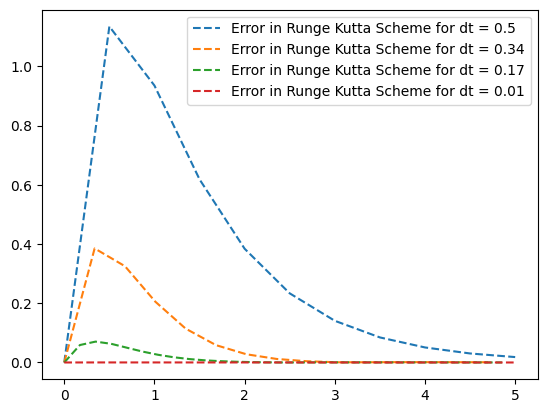

In [26]:
for i in range(len(dts)):
    e_rk = abs(Runge_Kutta(a, b, dts[i], f)[0] - u_exact(Runge_Kutta(a, b, dts[i], f)[1]))
    plt.plot(Runge_Kutta(a, b, dts[i], f)[1], e_rk, ls='dashed', label = f"Error in Runge Kutta Scheme for dt = {np.round(dts[i], 2)}")
plt.legend()

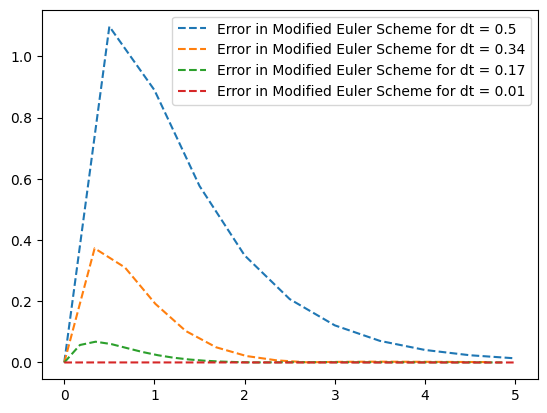

In [27]:
for i in range(len(dts)):
    e_me = abs(Euler_Scheme(a, b, dts[i], f, 'me')[0] - u_exact(Euler_Scheme(a, b, dts[i], f, 'me')[1]))
    plt.plot(Euler_Scheme(a, b, dts[i], f, 'me')[1], e_me, ls='dashed', label = f"Error in Modified Euler Scheme for dt = {np.round(dts[i], 2)}")
plt.legend()

Modified Euler scheme has the least error of the three as it is an hybrid of implicit and explicit schemesm thus having increased stability.

### Question 6 ###

In [28]:
x_0, v_0 = 0, 1
k = 1
m = 1
p_0 = m*v_0
dt = 0.001
nt = 5000
x_exact = lambda k, m, t:np.sqrt(m/k) * np.sin(np.sqrt(k/m)*t)
p_exact = lambda k, m, t: m * np.cos(np.sqrt(k/m)*t)
t = np.float32(np.zeros(nt))
for i in range(nt): t[i] = i*dt
x_e = np.float32(np.zeros(nt))
p_e = np.float32(np.zeros(nt))
x_e[0] = x_0
p_e[0] = p_0
for i in range(1,nt):
    x_e[i] = x_e[i-1] + (p_e[i-1]*dt)/m
    p_e[i] = p_e[i-1] - k*x_e[i-1]*dt

x_me = np.float32(np.zeros(nt))
p_me = np.float32(np.zeros(nt))
x_me[0] = x_0
p_me[0] = p_0
for i in range(1,nt):
    p_me[i] = p_me[i-1] - k*x_me[i-1]*dt
    x_me[i] = x_me[i-1] + (p_me[i]*dt)/m

x_be = np.float32(np.zeros(nt))
p_be = np.float32(np.zeros(nt))
x_be[0] = x_0
p_be[0] = p_0
A = np.float32(np.array([[1, -dt/m], [k*dt, 1]]))
for i in range(1,nt):
    b = np.float32(np.array([x_be[i-1], p_be[i-1]]))
    x_be[i], p_be[i] = np.linalg.solve(A, b)
    # p_be[i] = sol[0]
    # x_be[i] = sol[1]
x_analytical = x_exact(k, m, t)
p_analytical = p_exact(k, m, t)

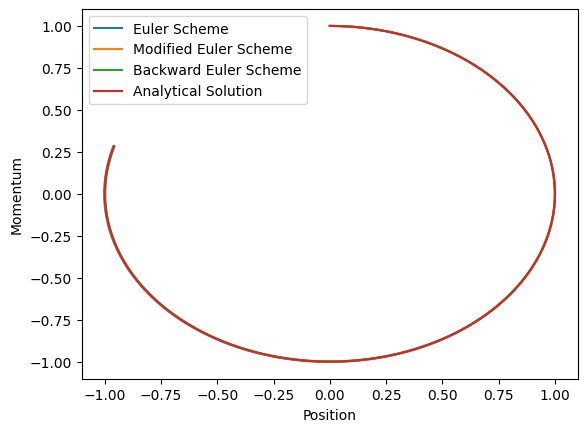

In [29]:
# plt.plot(t, x_be, label='Euler Scheme')
# plt.show()
plt.plot(x_e, p_e, label='Euler Scheme')
plt.plot(x_me, p_me, label="Modified Euler Scheme")
plt.plot(x_be, p_be, label="Backward Euler Scheme")
plt.plot(x_analytical, p_analytical, label="Analytical Solution")
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.legend()
plt.show()

Comparing with the exact solution, we can see that the Euler scheme results in growth in the position and momentum with time, leading to an ever larger spiral. Backward Euler scheme results in the decay of both position and momentum with time, thus we get an ever smaller spiral. Modified Euler remains relatively stable when comapred to the analytical solution and hence remains bounded.

In [30]:
TE = lambda x, p, m, k: 0.5*k*x**2 + 0.5*(p**2/m)
TE_e = TE(x_e, p_e, m, k)
TE_me = TE(x_me, p_me, m, k)
TE_be = TE(x_be, p_be, m, k)
TE_analytical = TE(x_analytical, p_analytical, m, k)

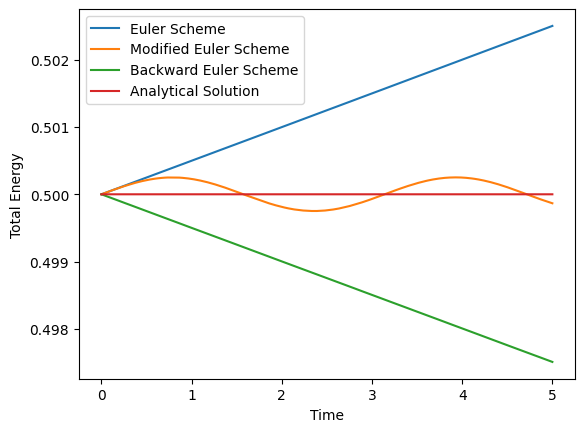

In [31]:
plt.plot(t, TE_e, label='Euler Scheme')
plt.plot(t, TE_me, label="Modified Euler Scheme")
plt.plot(t, TE_be, label="Backward Euler Scheme")
plt.plot(t, TE_analytical, label="Analytical Solution")
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.legend()

Energy appears to increase and decrease with time in the Euler and Backwards Euler schemes respectively, indicating that energy is not conserved in these schemes.
Whereas, in Modified Euler, it remains relatively stable compared to the Analytical Solution, with minimal oscillations and hence, we can consider energy conserved in Modified Euler scheme.

In [32]:
dts = np.linspace(0, 1, 100)
A_fe = np.zeros((dts.size, 2, 2))
for i in range(len(dts)): A_fe[i] = np.array([[1, dts[i]/m], [-k*dts[i], 1]])
lam = np.complex64(np.linalg.eigvals(A_fe))
Err_factor = np.max(np.abs(lam), axis=1)
# print(lam)

Text(0.5, 0, 'Timestep')

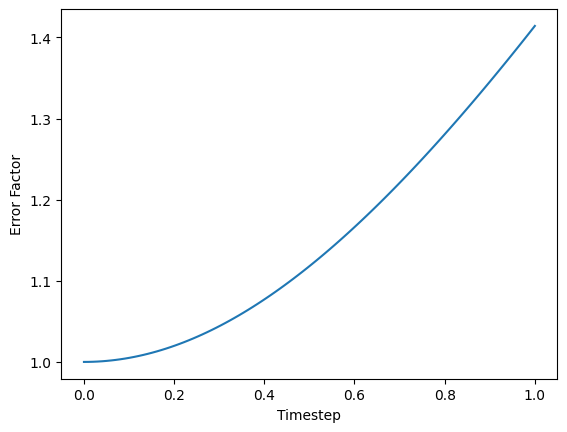

In [33]:
plt.plot(dts, Err_factor)
plt.ylabel('Error Factor')
plt.xlabel('Timestep')

In the case of explicit scheme, as the error factor is always greater than or equal to for any allowable dt value, the scheme ends up being unstable for all dt > 0 and hence, no range of values exist for which the scheme is stable.

In [34]:
dts = np.linspace(0, 2.5, 200)
A_me = np.zeros((dts.size, 2, 2))
for i in range(len(dts)): A_me[i] = np.array([[1 - (k/m)*(dts[i]**2), dts[i]/m], [-k*dts[i], 1]])
lam = np.complex64(np.linalg.eigvals(A_me))
Err_factor = np.max(np.abs(lam), axis=1)
# lam

Text(0.5, 0, 'Timestep')

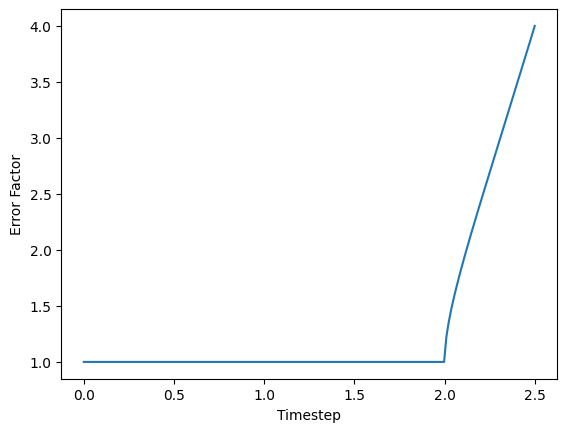

In [35]:
plt.plot(dts, Err_factor)
plt.ylabel('Error Factor')
plt.xlabel('Timestep')

In the case of modified Euler, using the above stability analysis, we get that error factor > 1 for all dt > 2 and hence, the modified scheme is unstable for all values of dt > 2.

### Question 7 ###

a) $$ F_d = -kp $$

where k is some constant and p is momentum

$$ F_net = F_g + F_d $$

So, $$ ma = -mg - kp $$

So, $$ a = -g-kp/m = -g-kv $$ as $$ v = p/m $$

Now, $$ a = dv/dt $$

Which implies that $$ dv/dt = -g-kv $$which is our desired PDE.

In [36]:
h_0, v_0 = 20, 5
k = 0.1
m = 1
n = 50
# drag = lambda k, v: -k*v
def give_acc(k, v):
    return -g-k*v
def Verlet_Sols(n, dt, h_0, v_0, k):
    # dt = 0.01
    nt = int(n/dt)
    t = np.linspace(0, n, nt)
    h = np.zeros_like(t)
    v = np.zeros_like(t)
    h[0] = h_0
    v[0] = v_0
    acc = give_acc(k, v[0])
    velhalf = v[0] + 0.5*acc*dt
    for i in range(1, nt):
        h[i] = h[i-1] + velhalf*dt
        acc = give_acc(k, velhalf)
        v[i] = velhalf + 0.5*acc*dt
        # acc = give_acc(g, k, velhalf)
        if(h[i]<0):
            frac = h[i-1]/(h[i-1]-h[i])
            h[i] = 0
            v[i] = v[i-1] + acc*frac*dt
            v[i] = -v[i]
            rem_dt = (1-frac)*dt
            acc = give_acc(k, v[i])
            # velhalf = v[i] + 0.5*acc*frac*dt
            v[i] = v[i] + acc*rem_dt
            h[i] = h[i] + v[i]*rem_dt
        acc = give_acc(k, v[i])
        velhalf = v[i] + 0.5*acc*dt
    return h, v, t

The plots are stable till dt = 0.05, after which, they destabilize.

(-1.0, 22.5)

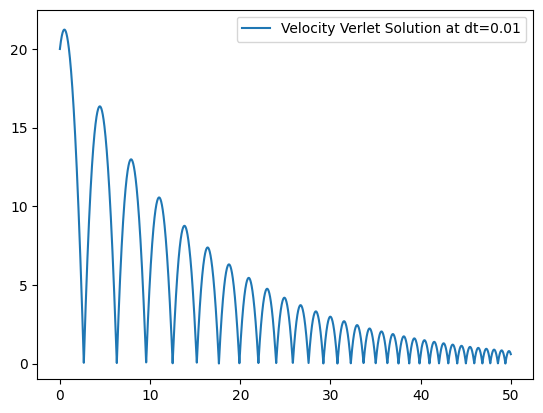

In [37]:
# dts = np.linspace(0.125/2, 0.5, 15)
# for i in dts:
h, v, t = Verlet_Sols(n, 0.01, h_0, v_0, k)
plt.plot(t, h, label = f'Velocity Verlet Solution at dt={0.01}')
plt.legend()
plt.ylim([-1, 22.5])

(-22.5, 22.5)

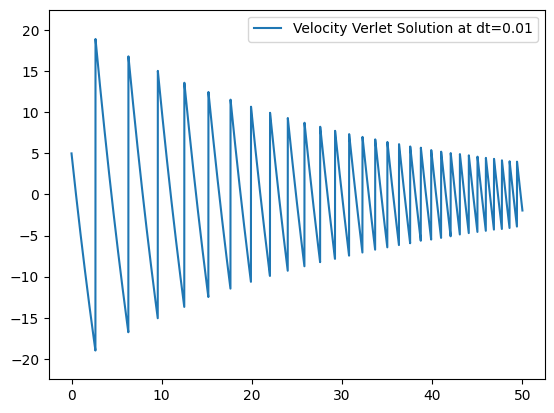

In [38]:
# dts = np.linspace(0.125/2, 0.5, 15)
# for i in dts:
    # h, v, t = Verlet_Sols(n, i, h_0, v_0, k)
plt.plot(t, v, label = f'Velocity Verlet Solution at dt=0.01')
plt.legend()
plt.ylim([-22.5, 22.5])

For values of dt from around 1.3 onwards, we begin to yield unstable results. So, we can empirically determine max timestep of stability to be around 1.3.

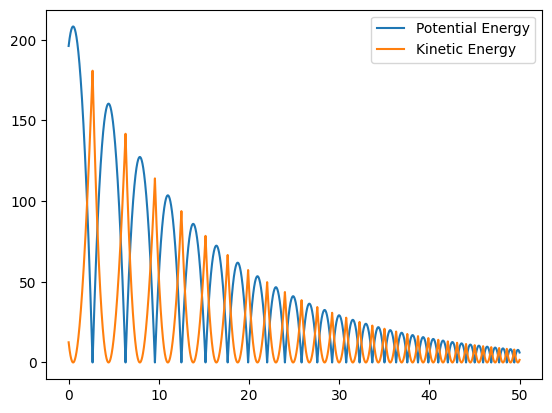

In [39]:
h, v, t = Verlet_Sols(n, 0.001, h_0, v_0, k)
KE = lambda v, m: 0.5 * m * (v**2)
PE = lambda h, m: m*g*h
PE_VV = PE(h, m)
KE_VV = KE(v, m)
TE_VV = PE_VV + KE_VV
# plt.ylim(0, 2.087e2+1)
plt.plot(t, PE_VV, label='Potential Energy')
plt.plot(t, KE_VV, label='Kinetic Energy')
plt.legend()

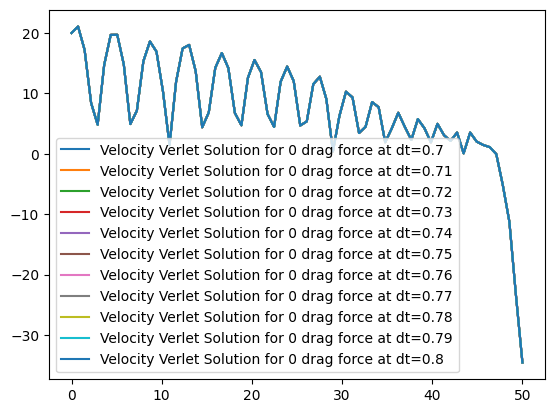

In [40]:
dts = np.linspace(0.7, 0.8, 11)
h, v, t = Verlet_Sols(n, 0.1, h_0, v_0, 0)
# plt.plot(t, h, label = f'Velocity Verlet Solution for 0 drag force at dt={0.1}')
for i in dts:
    h, v, t = Verlet_Sols(n, 0.71, h_0, v_0, 0)
    plt.plot(t, h, label = f'Velocity Verlet Solution for 0 drag force at dt={i}')
plt.legend()
# plt.ylim([-1, 22.5])

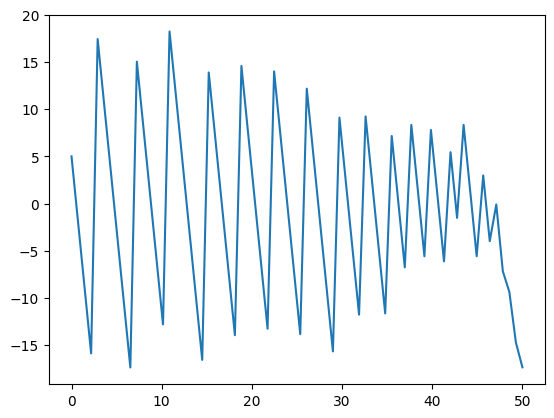

In [41]:
plt.plot(t, v)

Yes, we get the expected result of height and velocity values oscillating over time when drag force is zero. Obtained results are not as sensitive as those considering drag force, but still remain sensitive to timestep, showing stability until around dt = 0.7.

### Question 8 ###

In [42]:
#Direct approach

k = 3

I = np.eye(k,k)
I

d = np.ones(k)

MM = sp.sparse.diags([d,-2*d,d], [-1,0,1], shape=(k,k))
M = MM.toarray()
S = np.kron(M,I)+np.kron(I,M)
S
def get_A(k):
    e = np.ones((k))
    I = np.eye(k,k)
    MM = sp.sparse.diags([e, -2*e, e],offsets=[-1, 0,1], shape=(k,k))
    M = MM.toarray()
    S = np.kron(M,I) + np.kron(I,M)
    return S
Lx = 1.0
Ly = 1.0

nx = 3
ny = 3

x = np.linspace(0, Lx, nx+2)
# print(x)

y = np.linspace(0, Ly, ny+2)
# print(y)

dx = Lx/(nx+1)
dy = Ly/(ny+1)


##Temperature at the boundary
Tleft = 0.
Tbottom = 0.
Tright = 100.
Ttop = 100.

#Initializing Temperature
u = np.empty((nx+2,ny+2))
u.shape


Tguess = 10.
u.fill(Tguess)

#Boundary conditions
u[0,:]=Tleft

u[(nx+1):,:]=Tright

u[:,(ny+1):]=Ttop

u[:,0]=Tbottom

# print(T)

## Now get A matrix

A = get_A(nx)

print(A)


## get b

bvert = np.zeros(ny*nx)
bhor = np.zeros(nx*ny)
for i in range(1,ny+1):
    bvert[i-1] = u[0,i]
    bvert[ny**2 - i] = u[ny+1, ny-i+1]

# print(bvert)

for i in range(1,nx+1):
    bhor[(i-1)*nx]= u[i,0]
    bhor[(i-1)*nx + (nx-1)] = u[i, nx+1]

# print(bhor)

B = -bvert -bhor

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.]]


Matrix A and vector B form the system AT = B, where T is the vector of temperatures we have to find.

In [43]:
def LU_Decomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    for i in range(n):
        for j in range(i+1, n):
            factor = U[j, i]/U[i, i]
            U[j, :] -= factor*U[i, :]
            L[j, i] = factor
    return L, U
L, U = LU_Decomposition(A)
# print(L)
# print(U)
# np.dot?
def Forward_Substitution(L, b):
    y = np.zeros_like(b)
    for i in range(len(y)):
        y[i] = b[i] - np.dot(L[i, 0:i], y[0:i])
    return y
def Backward_Substitution(U, y):
    x = np.zeros_like(y)
    for i in range(len(x)-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, (i+1):], x[(i+1):]))/U[i, i]
    return x
# print(A, b)
# b = np.float64(b)
T_ = Forward_Substitution(L, B)
T_LU = Backward_Substitution(U, T_)
# print(x)
# T.reshape(3,3)

print(u)
u[1:-1,1:-1] = T_LU.reshape(3,3)
print(u)

[[  0.   0.   0.   0. 100.]
 [  0.  10.  10.  10. 100.]
 [  0.  10.  10.  10. 100.]
 [  0.  10.  10.  10. 100.]
 [  0. 100. 100. 100. 100.]]
[[  0.           0.           0.           0.         100.        ]
 [  0.          14.28571429  28.57142857  50.         100.        ]
 [  0.          28.57142857  50.          71.42857143 100.        ]
 [  0.          50.          71.42857143  85.71428571 100.        ]
 [  0.         100.         100.         100.         100.        ]]


In [44]:
def mySeidel(A,b,max_iter,tol):
    n = np.size(A[0])
    b = np.reshape(b,[n,1])
    z = np.reshape(np.diagonal(A),[n,1])
    # i != j
    B = A - np.diag(np.diagonal(A))
    L = np.tril(B)
    U = np.triu(B)
    x = np.float64(np.zeros_like(b))
    # x_o = np.zeros_like(b)
    for i in range(max_iter):
        x_o = x.copy()
        for j in range(n):
            x[j] = (b[j] - np.dot(L[j,:], x) - np.dot(U[j,:], x_o))/z[j]
        # x = (b - np.dot(B,x_o))/z
        e = np.linalg.norm(x-x_o, ord='fro')
        # print(x,e)
        if e < tol:
            print(f'Iterations converged after {i} steps')
            break
    return x
T_Se = mySeidel(A, B, 50, 1e-12)
# x_100 = mySeidel(A, b, 100, 1e-12)
u[1:-1,1:-1] = T_Se.reshape(3,3)
print(u)


Iterations converged after 48 steps
[[  0.           0.           0.           0.         100.        ]
 [  0.          14.28571429  28.57142857  50.         100.        ]
 [  0.          28.57142857  50.          71.42857143 100.        ]
 [  0.          50.          71.42857143  85.71428571 100.        ]
 [  0.         100.         100.         100.         100.        ]]


In [45]:
print(A@T_LU-B)
print((A@T_Se).reshape(len(A@T_Se)) - B)

[ 0.00000000e+00  0.00000000e+00 -2.84217094e-14 -1.42108547e-14
  2.84217094e-14 -1.42108547e-14 -2.84217094e-14 -1.42108547e-14
  2.84217094e-14]
[4.54747351e-13 3.26849658e-13 1.13686838e-13 3.26849658e-13
 2.27373675e-13 2.84217094e-14 1.13686838e-13 2.84217094e-14
 0.00000000e+00]


In [46]:
print(A@T_LU - (A@T_Se).reshape(len(A@T_Se)))

[-4.54747351e-13 -3.26849658e-13 -1.42108547e-13 -3.41060513e-13
 -1.98951966e-13 -4.26325641e-14 -1.42108547e-13 -4.26325641e-14
  2.84217094e-14]


On comparing the two solutions, we can see that the difference between them is of the order of 10^-14. Such a marginal error implies that both schemes return the same solution on average and are both correct.

### Question 9 ###

$$ \frac{\partial T}{\partial t} = K\frac{\partial^2 T}{\partial x^2} $$
$$ T(x=0, t) = 25 $$
$$ \frac{\partial T}{\partial x}(x=1, t) = 0 $$

Discretization of the Heat Equation using Explicit and Implicit Schemes:

$$ x_i = i\Delta x, t_j = j\Delta t $$
$$ T_{i, j} = T(x_i, t_j) $$

1) Explicit Scheme (Forward in Time, Central in Space):

$$ \frac{\partial T}{\partial t} \approx \frac{T_{i, j+1} - T_{i, j}}{\Delta t} $$
$$ \frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{\Delta x^2} $$
$$ \implies \frac{T_{i, j+1} - T_{i, j}}{\Delta t} = K\frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{\Delta x^2}$$
$$ \implies T_{i, j+1} = T_{i, j} + F*(T_{i+1, j} - 2T_{i, j} + T_{i-1, j}),  F = \frac{K\Delta t}{\Delta x^2}$$

1) Implicit Scheme (Backward in Time, Central in Space):

$$ \frac{\partial T}{\partial t} \approx \frac{T_{i, j} - T_{i, j-1}}{\Delta t} $$
$$ \frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{\Delta x^2} $$
$$ \implies \frac{T_{i, j} - T_{i, j-1}}{\Delta t} = K\frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{\Delta x^2}$$
$$ \implies T_{i, j-1} = T_{i, j} - F*(T_{i+1, j} - 2T_{i, j} + T_{i-1, j}),  F = \frac{K\Delta t}{\Delta x^2}$$
$$ \implies T_{i, j} = - F*T_{i-1, j+1} + (1+2F)*T_{i, j+1} - F*T_{i+1, j+1}$$
$$ T_j = [T_{0, j}, T_{1, j}, ....., T_{n, j}]$$
So, we get the system, 
$$ A*T_{j+1} = T_j$$
Solving this system nets us the temperature distribution of the rod at the next timestep.

In [47]:
#length 
L = 1.0

#spatial divisions
dx = 0.1

n = 5
dt = 0.00006
K = 1
f = lambda x: 10*np.exp(-x**2)
def returnTempFTCS(L, dx, n, dt, K, f):
    nx = int(L/dx)
    nt = int(n/dt)
    x = np.linspace(0., 1., nx+1)
    # for i in range(len(x)): x[i] = i*dx

    #iteration

    #timestep
    # print('dt=',dt)

    t = np.linspace(0., n, nt+1)
    # print(t)

    #kappa

    #Fourier number
    F = K*dt/(dx**2)
    print('Fourier number=', F)

    ##temp
    u = np.zeros((nx+1, nt+1))

    #initial temperature (t=0) profile
    u[:,0] = f(x)

    #boundary conditions
    u[0,:] = 25.
    u[-1, :] = u[-2, :]

    for j in range(1,nt):
        for i in range(1, nx):
            u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])
        # u[0, j] = 25
        u[-1, j] = u[-2, j]
    return x, u

Fourier number= 0.005999999999999999


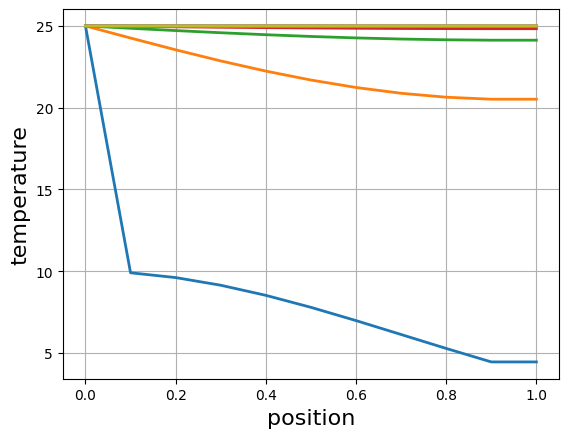

In [48]:
x, u = returnTempFTCS(L, dx, n, dt, K, f)
nt = int(n/dt)
for j in range(nt):
    if j%10000 == 0:
        plt.plot(x, u[:,j], ls='-', lw=2)

plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()

plt.show()

Fourier number= 0.6


C:\Users\HP\AppData\Local\Temp\ipykernel_20724\1659800145.py:43: RuntimeWarning: overflow encountered in scalar add
  u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])
C:\Users\HP\AppData\Local\Temp\ipykernel_20724\1659800145.py:43: RuntimeWarning: overflow encountered in scalar subtract
  u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])
C:\Users\HP\AppData\Local\Temp\ipykernel_20724\1659800145.py:43: RuntimeWarning: invalid value encountered in scalar add
  u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])
C:\Users\HP\AppData\Local\Temp\ipykernel_20724\1659800145.py:43: RuntimeWarning: invalid value encountered in scalar subtract
  u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])


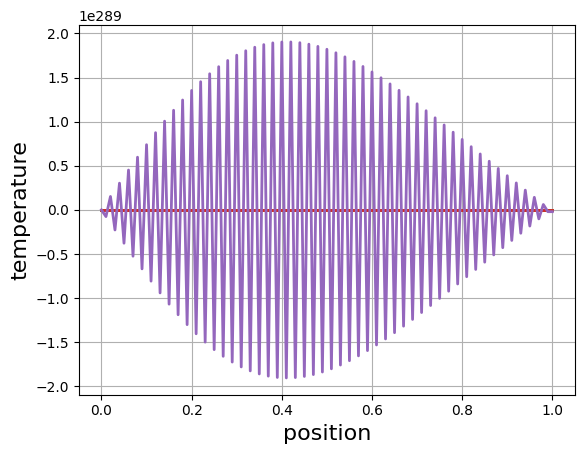

(101, 83334)

In [49]:
x, u = returnTempFTCS(L, 0.01, n, dt, K, f)
# for j in range(nt):
#     while j%2000 == 0:
#         if j%400 == 0:
plt.plot(x, u[:,400], ls='-', lw=2)
plt.plot(x, u[:,800], ls='-', lw=2)
plt.plot(x, u[:,1200], ls='-', lw=2)
plt.plot(x, u[:,1600], ls='-', lw=2)
plt.plot(x, u[:,2000], ls='-', lw=2)

plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()

plt.show()
np.shape(u)

When we taking dx = 0.1, our Fourier number is F = 0.006, and we can see that the Temperature gradient remains stable over time. But in the case where dx=0.01, our F = 0.6. For Temperature gradient to remain stable, F < 0.5, and we can see in the case when F = 0.6, the temperature plot destabilizes and grows unbounded with time. (Comments on accuracy to be added later).

Fourier no= 0.005999999999999999


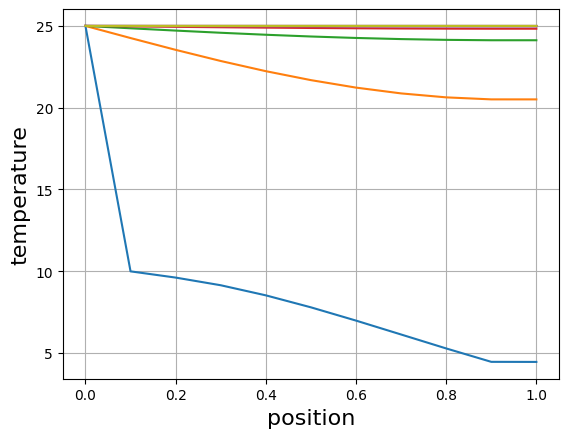

In [50]:
# L = 1.0
# nx = 50

# print(x)
# dx = x[1]-x[0]

# nt = 5000
# dt = 0.0006
def returnTempBTCS(L, dx, n, dt, K, f):
    nx = int(L/dx)
    x = np.linspace(0., L, nx+1)
    nt = int(n/dt)
    t = np.linspace(0., nt*dt, nt+1)
    # print(t)

    # k = 0.1
    F = K*dt/(dx**2)
    print('Fourier no=', F)

    #function
    u = np.zeros((nx+1))

    #initial condition
    u_0 = f(x)

    #Ax=b
    A = np.zeros((nx+1, nx+1))
    b = np.zeros(nx+1)

    for i in range(1,nx):
        A[i,i] = 1 + 2*F
        A[i,i+1] = -1*F
        A[i,i-1] = -1*F
        A[0,0] = 1.
        A[nx,nx] = 1.
        
    for n in range(0, nt):
        b = u_0
        b[0] = 25.
        b[-1] = u_0[-2]
        u = np.linalg.solve(A,b)
        #update u_0
        u_0[:] = u[:]
        if n%10000 == 0:
            plt.plot(x,u_0)
    
    return F
F = returnTempBTCS(L, dx, n, dt, K, f)
plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()

plt.show()

### Question 10 ###

$$ \frac{\partial c(r, t)}{\partial t} = \nabla \cdot D \nabla c(r, t) $$
$$ c(r, 0) = 1, when \enspace (x-x_0)^2+(y-y_0)^2 \leq R^2, else \enspace c(r, 0) = 0$$
$$ c_{bottom} = c_{top} = c_{left} = c_{right} = c_0 $$

Discretization of the Concentration Equation:

$$ x_i = i\Delta x, y_j = j\Delta y, t_k = k\Delta t $$
$$ T_{i, j, k} = T(x_i, y_j, t_k) $$

$$i)\enspace D = D_0: $$

$$ \frac{\partial c}{\partial t} \approx \frac{c_{i, j, k+1} - c_{i, j, k}}{\Delta t} $$
$$ \nabla \cdot D \nabla c(r, t) = D_0 \nabla^2 c(r, t) = D_0\frac{\partial^2 c}{\partial x^2} + D_0\frac{\partial^2 c}{\partial y^2} \approx D_0\frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta x^2} + D_0\frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta y^2} $$
$$ \implies \frac{c_{i, j, k+1} - c_{i, j, k}}{\Delta t} = D_0\frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta x^2} + D_0\frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta y^2}$$
$$ \implies c_{i, j, k+1} = c_{i, j, k} + {F_x}*(c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}) + {F_y}*(c_{i, j+1, k} - 2c_{i, j, k} + c_{i, j-1, k}),  F_x = \frac{D_0\Delta t}{\Delta x^2},  F_y = \frac{D_0\Delta t}{\Delta y^2}$$

In [51]:
#length 
# L = 1.0

#spatial divisions
dx = 0.1
dy = 0.1
R = 3
n = 1
dt = 1e-3
D_0 = 1e-2
x_0, y_0 = 5, 5
c_0 = 3
f = lambda x, x_0, y, y_0, R: np.where((x-x_0)**2 + (y-y_0)**2 <= R**2, 1, 0)
L_x = 10.0
L_y = 10.0
print((np.pi*R**2)/(L_x*L_y)*100)
def returnConcFTCS(L_x, dx, n, dt, D_0, f, L_y, dy, R, c_0):
    nx = int(L_x/dx)
    ny = int(L_y/dy)
    nt = int(n/dt)
    x = np.linspace(0., L_x, nx+1)
    y = np.linspace(0., L_y, ny+1)
    # for i in range(len(x)): x[i] = i*dx

    #iteration

    #timestep
    # print('dt=',dt)

    # t = np.linspace(0., n, nt+1)
    # print(t)

    #kappa
    X, Y = np.meshgrid(x, y, indexing='ij')

    #Fourier number
    F_x = D_0*dt/(dx**2)
    F_y = D_0*dt/(dy**2)
    # print('Fourier number=', F)

    ##temp
    c = np.zeros((nx+1, ny+1, nt+1))

    #initial temperature (t=0) profile
    c[:,:,0] = f(X, x_0, Y, y_0, R)
    # print(c[::10,::10,0])
    #boundary conditions
    c[0, :, :] = c_0
    c[-1, :, :] = c_0
    c[:, -1, :] = c_0
    c[:, 0, :] = c_0

    for k in range(1,nt+1):
        c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + F_x*(c[2:,1:-1, k-1] - 2*c[1:-1,1:-1, k-1] + c[:-2,1:-1, k-1]) + F_y*(c[1:-1,2:, k-1] - 2*c[1:-1,1:-1, k-1] + c[1:-1,:-2, k-1])
        # for i in range(1, nx):
        #     for j in range(1, ny):
        #         c[i,j, k] = c[i,j, k-1] + F_x*(c[i+1,j, k-1] - 2*c[i,j, k-1] + c[i-1,j, k-1]) + F_y*(c[i,j+1, k-1] - 2*c[i,j, k-1] + c[i,j-1, k-1])
        # c[0, j] = 25
        # c[-1, j] = c[-2, j]
    return X, Y, c
#length 
        

28.274333882308138


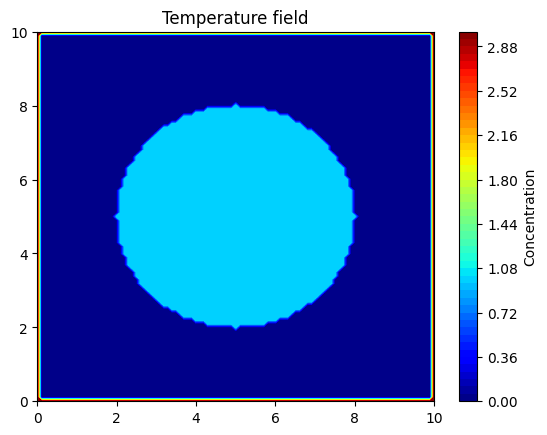

In [52]:
X, Y, c = returnConcFTCS(L_x, dx, n, dt, D_0, f, L_y, dy, R, c_0)
colorinterpolation = 50
# colorMap = plt.cm.Jet

fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
# y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='jet', vmin=0, vmax=3)
# plt.show()
# y = ax.contourf(X,Y,c[:,:,int(2*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(3*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(4*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()

In [53]:
X, Y, c = returnConcFTCS(L_x, dx, n, dt, D_0, f, L_y, dy, R, c_0)
colorinterpolation = 50
# colorMap = plt.cm.Jet

fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
# y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
y = ax.contourf(X,Y,c[:,:,int(n/(5*dt))],colorinterpolation, cmap='jet', vmin=0, vmax=3)
# plt.show()
# y = ax.contourf(X,Y,c[:,:,int(2*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(3*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(4*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()

KeyboardInterrupt: 

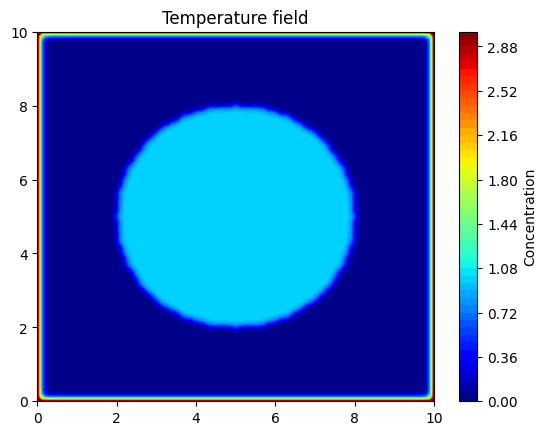

In [ ]:
fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
# y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
y = ax.contourf(X,Y,c[:,:,int(2*n/(5*dt))],colorinterpolation, cmap='jet', vmin=0, vmax=3)
# plt.show()
# y = ax.contourf(X,Y,c[:,:,int(2*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(3*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(4*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()

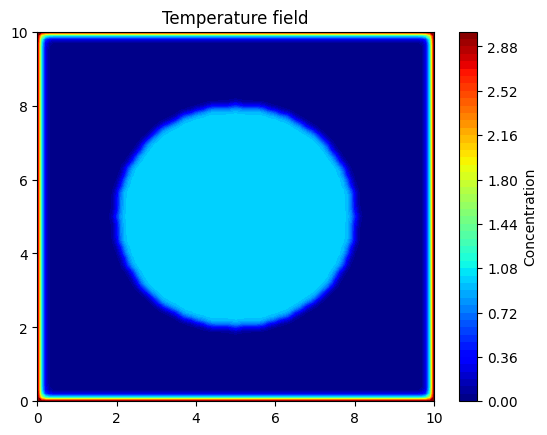

In [ ]:
fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
# y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
y = ax.contourf(X,Y,c[:,:,int(3*n/(5*dt))],colorinterpolation, cmap='jet', vmin=0, vmax=3)
# plt.show()
# y = ax.contourf(X,Y,c[:,:,int(2*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(3*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(4*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()

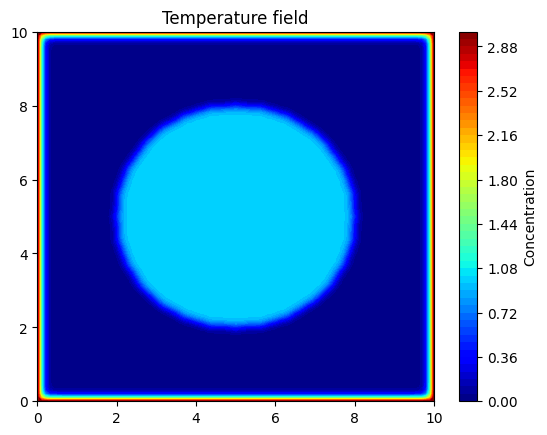

In [ ]:
fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
# y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
y = ax.contourf(X,Y,c[:,:,int(4*n/(5*dt))],colorinterpolation, cmap='jet', vmin=0, vmax=3)
# plt.show()
# y = ax.contourf(X,Y,c[:,:,int(2*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(3*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(4*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()

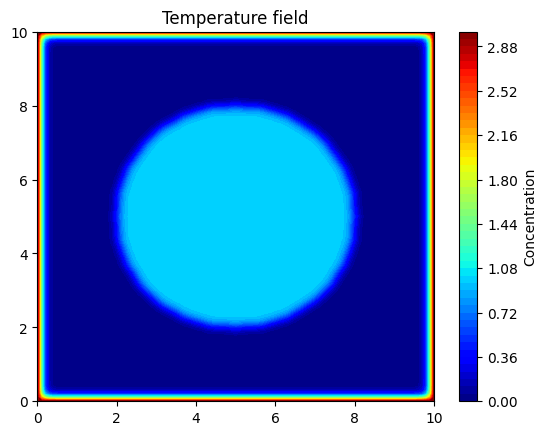

In [ ]:
fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
# y = ax.contourf(X,Y,c[:,:,0],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
y = ax.contourf(X,Y,c[:,:,int(n/dt)],colorinterpolation, cmap='jet', vmin=0, vmax=3)
# plt.show()
# y = ax.contourf(X,Y,c[:,:,int(2*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(3*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# # plt.show()
# y = ax.contourf(X,Y,c[:,:,int(4*n/5*dt)],colorinterpolation, cmap='hot', vmin=0, vmax=3)
# plt.show()
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()

$$ii)\enspace D = D_0((x-x_0)^2+(y-y_0)^2): $$

$$ \frac{\partial c}{\partial t} \approx \frac{c_{i, j, k+1} - c_{i, j, k}}{\Delta t} $$
$$ \nabla \cdot D \nabla c(r, t) = \nabla D \cdot \nabla c(r, t) + D \nabla^2 c(r, t) = \frac{\partial D}{\partial x}\frac{\partial c}{\partial x} + \frac{\partial D}{\partial y}\frac{\partial c}{\partial y} + D\frac{\partial^2 c}{\partial x^2} + D\frac{\partial^2 c}{\partial y^2}$$
$$ D(x_i, y_j) = D_{i, j} $$
$$ \implies \nabla \cdot D \nabla c(r, t) \approx \frac{D_{i+1, j} - D_{i, j}}{\Delta x}\frac{c_{i+1, j, k} - c_{i, j, k}}{\Delta x} + \frac{D_{i, j+1} - D_{i, j}}{\Delta y}\frac{c_{i, j+1, k} - c_{i, j, k}}{\Delta y} + D_{i, j}(\frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta x^2} + \frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta y^2})$$
$$ \implies \frac{c_{i, j, k+1} - c_{i, j, k}}{\Delta t} = \frac{D_{i+1, j} - D_{i, j}}{\Delta x}\frac{c_{i+1, j, k} - c_{i, j, k}}{\Delta x} + \frac{D_{i, j+1} - D_{i, j}}{\Delta y}\frac{c_{i, j+1, k} - c_{i, j, k}}{\Delta y} + D_{i, j}(\frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta x^2} + \frac{c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k}}{\Delta y^2})$$
$$ \implies c_{i, j, k+1} = c_{i, j, k} + \frac{\Delta t}{\Delta x^2}((D_{i+1, j} - D_{i, j})(c_{i+1, j, k} - c_{i, j, k}) - D_{i, j}(c_{i+1, j, k} - 2c_{i, j, k} + c_{i-1, j, k})) + \frac{\Delta t}{\Delta y^2}((D_{i, j+1} - D_{i, j})(c_{i, j+1, k} - c_{i, j, k})-D_{i, j}(c_{i, j+1, k} - 2c_{i, j, k} + c_{i, j-1, k}))$$

In [ ]:
# D_max = D_0 * ((L_x - x_0)**2 + (L_y - y_0)**2)
# dt = 0.5 * (dx**2 * dy**2) / (D_max * (dx**2 + dy**2))
def returnConcD(L_x, dx, n, dt, D_0, f, L_y, dy, R, c_0):
    nx = int(L_x/dx)
    ny = int(L_y/dy)
    nt = int(n/dt)
    x = np.linspace(0., L_x, nx+1)
    y = np.linspace(0., L_y, ny+1)
    # for i in range(len(x)): x[i] = i*dx

    #iteration

    #timestep
    # print('dt=',dt)

    # t = np.linspace(0., n, nt+1)
    # print(t)

    #kappa
    X, Y = np.meshgrid(x, y, indexing='ij')

    #Fourier number
    D_x = dt/(dx**2)
    D_y = dt/(dy**2)
    # print('Fourier number=', F)

    ##temp
    c = np.zeros((nx+1, ny+1, nt+1))

    #initial temperature (t=0) profile
    c[:,:,0] = f(X, x_0, Y, y_0, R)
    # print(c[::10,::10,0])
    #boundary conditions
    c[0, :, :] = c_0
    c[-1, :, :] = c_0
    c[:, -1, :] = c_0
    c[:, 0, :] = c_0

    D = D_0*((X-x_0)**2+(Y-y_0)**2)
    for k in range(1,nt+1):
        c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + D_x*((D[2:, 1:-1]-D[1:-1, 1:-1])*(c[2:,1:-1, k-1] - c[1:-1,1:-1, k-1]) - (c[2:,1:-1, k-1] - 2*c[1:-1,1:-1, k-1] + c[:-2,1:-1, k-1])) + D_y*((D[1:-1, 2:]-D[1:-1, 1:-1])*(c[1:-1,2:, k-1] - c[1:-1,1:-1, k-1]) - (c[1:-1,2:, k-1] - 2*c[1:-1,1:-1, k-1] + c[1:-1,:-2, k-1]))
        # for i in range(1, nx):
        #     for j in range(1, ny):
        #         c[i,j, k] = c[i,j, k-1] + F_x*(c[i+1,j, k-1] - 2*c[i,j, k-1] + c[i-1,j, k-1]) + F_y*(c[i,j+1, k-1] - 2*c[i,j, k-1] + c[i,j-1, k-1])
        # c[0, j] = 25
        # c[-1, j] = c[-2, j]
    return X, Y, c

C:\Users\HP\AppData\Local\Temp\ipykernel_26488\3585134178.py:41: RuntimeWarning: overflow encountered in add
  c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + D_x*((D[2:, 1:-1]-D[1:-1, 1:-1])*(c[2:,1:-1, k-1] - c[1:-1,1:-1, k-1]) - (c[2:,1:-1, k-1] - 2*c[1:-1,1:-1, k-1] + c[:-2,1:-1, k-1])) + D_y*((D[1:-1, 2:]-D[1:-1, 1:-1])*(c[1:-1,2:, k-1] - c[1:-1,1:-1, k-1]) - (c[1:-1,2:, k-1] - 2*c[1:-1,1:-1, k-1] + c[1:-1,:-2, k-1]))
C:\Users\HP\AppData\Local\Temp\ipykernel_26488\3585134178.py:41: RuntimeWarning: overflow encountered in subtract
  c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + D_x*((D[2:, 1:-1]-D[1:-1, 1:-1])*(c[2:,1:-1, k-1] - c[1:-1,1:-1, k-1]) - (c[2:,1:-1, k-1] - 2*c[1:-1,1:-1, k-1] + c[:-2,1:-1, k-1])) + D_y*((D[1:-1, 2:]-D[1:-1, 1:-1])*(c[1:-1,2:, k-1] - c[1:-1,1:-1, k-1]) - (c[1:-1,2:, k-1] - 2*c[1:-1,1:-1, k-1] + c[1:-1,:-2, k-1]))
C:\Users\HP\AppData\Local\Temp\ipykernel_26488\3585134178.py:41: RuntimeWarning: overflow encountered in multiply
  c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + D

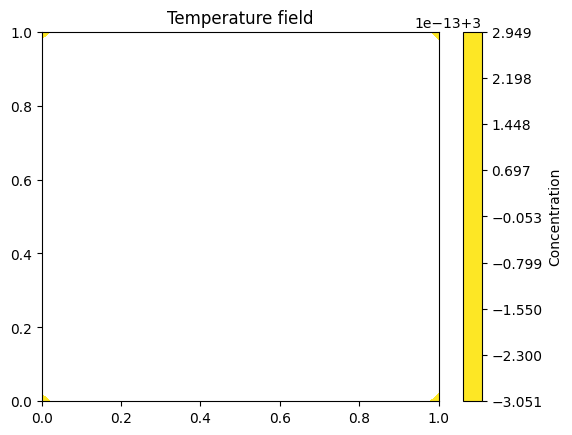

In [ ]:
# dt = 0.0005
L_x, L_y = 1, 1
dx, dy = 0.02, 0.02
dt = 1e-3
x_0, y_0 = 0.5, 0.5
R=0.25
X, Y, c = returnConcD(L_x, dx, n, dt, D_0, f, L_y, dy, R, c_0)
colorinterpolation = 50
colorMap = plt.cm.viridis

fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
y = ax.contourf(X,Y,c[:,:,-1],colorinterpolation, cmap=colorMap, vmin=0, vmax=3)
cb = fig.colorbar(y, ax=ax)
cb.set_label("Concentration")
# fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()